<a href="https://colab.research.google.com/github/ShathaMelhem/FNN_CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
import os

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rockpaperscissors


In [26]:
# akses data
for dirname, _, filenames in os.walk('/kaggle/input/rockpaperscissors'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rockpaperscissors/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/paper/cQ0dBO3yHPohZ9U9.png
/kaggle/input/rockpaperscissors/paper/jAh36hlZLpECSBHp.png
/kaggle/input/rockpaperscissors/paper/QnjBVl6cFnyd2hVF.png
/kaggle/input/rockpaperscissors/paper/dZh2VMRu9nRGHhYL.png
/kaggle/input/rockpaperscissors/paper/SDQQfzHl47yNqA6K.png
/kaggle/input/rockpaperscissors/paper/E10FR2TKbBsv9Hgm.png
/kaggle/input/rockpaperscissors/paper/BoMfAmQYWtoiGHBV.png
/kaggle/input/rockpaperscissors/paper/AfvIbTwxuG0q7Ij1.png
/kaggle/input/rockpaperscissors/paper/41HC0VBlHSRhi0AG.png
/kaggle/input/rockpaperscissors/paper/gpipGA62xfMjfr8O.png
/kaggle/input/rockpaperscissors/paper/9rwmakEj6Wg1YQWW.png
/kaggle/input/rockpaperscissors/paper/D3mbFhVy7zFkZEtV.png
/kaggle/input/rockpaperscissors/paper/cuDzhxpWujBPgJmX.png
/kaggle/input/rockpaperscissors/paper/5FVy5hSvZ9c0M2Y5.png
/kaggle/input/rockpaperscissors/paper/4aWP3XumkgwZtqZ7.png
/kaggle/input/rockpaperscissors/paper/aac4C8FFlVQw6aGM.png

In [27]:
# load dataset
import cv2
import glob
image_paths = glob.glob('/kaggle/input/rockpaperscissors/*/*.png')
images = [cv2.imread(image_path) for image_path in image_paths]

In [28]:
labels = [path.split('/')[-2] for path in image_paths]

In [30]:
from collections import defaultdict
label_counts = defaultdict(int)
for label in labels:
    label_counts[label] += 1

for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nTotal images:", sum(label_counts.values()))

paper: 712
rock: 726
scissors: 750

Total images: 2188


In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

height = 150
width = 150
channels = 3  # jumlah saluran warna (RGB)

# Mengubah gambar menjadi array NumPy dan mengubah ukuran
images_resized = [cv2.resize(image, (height, width)) for image in images]
X = np.array(images_resized)
y = np.array(labels_encoded)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode labels for multi-class classification
num_classes = len(np.unique(labels))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

In [32]:
# one hot encoding
import numpy as np
from tensorflow.keras.utils import to_categorical

# One-hot encode labels for multi-class classification
num_classes = len(np.unique(labels))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("Building a deep fully connected model with regularization...")

# model cnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(height, width, channels)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))


# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(" Model compiled successfully.\n")

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=5,             # Stop after 5 epochs without improvement
    restore_best_weights=True
)

Building a deep fully connected model with regularization...
 Model compiled successfully.



In [44]:
# Train the model
history = model.fit(
    X_train, y_train_encoded,  # Use one-hot encoded training labels
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val_encoded), # Use one-hot encoded validation labels
    callbacks=[early_stop],
    verbose=1
)

print("\n Training finished. Evaluating model...")

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - accuracy: 0.3422 - loss: 43.3126 - val_accuracy: 0.3858 - val_loss: 1.1943
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6387 - loss: 0.8600 - val_accuracy: 0.8288 - val_loss: 0.4271
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8820 - loss: 0.3150 - val_accuracy: 0.8402 - val_loss: 0.4047
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9350 - loss: 0.1777 - val_accuracy: 0.9361 - val_loss: 0.1699
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9693 - loss: 0.0824 - val_accuracy: 0.9521 - val_loss: 0.1456
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9902 - loss: 0.0323 - val_accuracy: 0.9589 - val_loss: 0.1129
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9972 - loss: 0.0146 - val_accuracy: 0.9658 - val_loss: 0.1021
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9995 - loss: 0.0070 - val_accuracy: 0.9658 -

### Evaluate the model

In [45]:
#evaluate the model
loss, accuracy = model.evaluate(X_val, y_val_encoded)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9750 - loss: 0.0846
Validation Loss: 0.0921
Validation Accuracy: 97.49%


### Visualize Training History

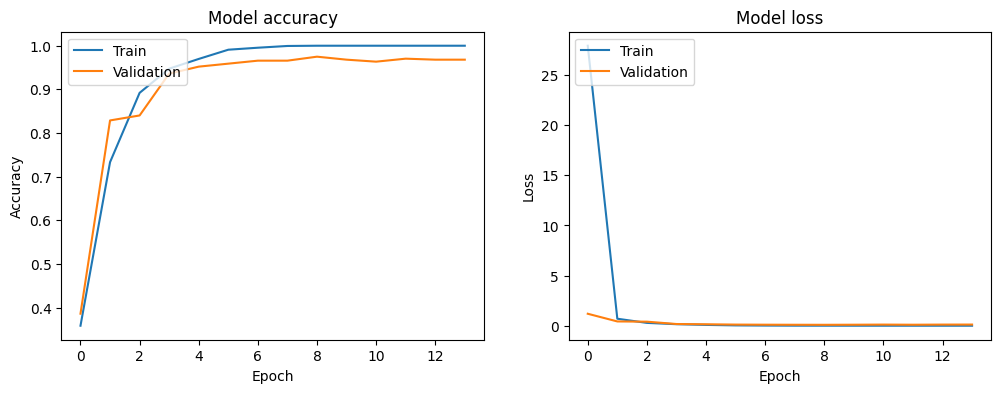

In [46]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()